# Camera Calibration
This notebook covers the first part of the Advanced Lane Finding project. 

Goal: Determine camera matrix and distortion coefficients
Method: Use distorted pictures of chessboard images and derive matrix&coeff. from revocering known ideal chessboard shape

### Find Corners

ERROR - no corners found:  camera_cal/calibration1.jpg
ERROR - no corners found:  camera_cal/calibration4.jpg
ERROR - no corners found:  camera_cal/calibration5.jpg


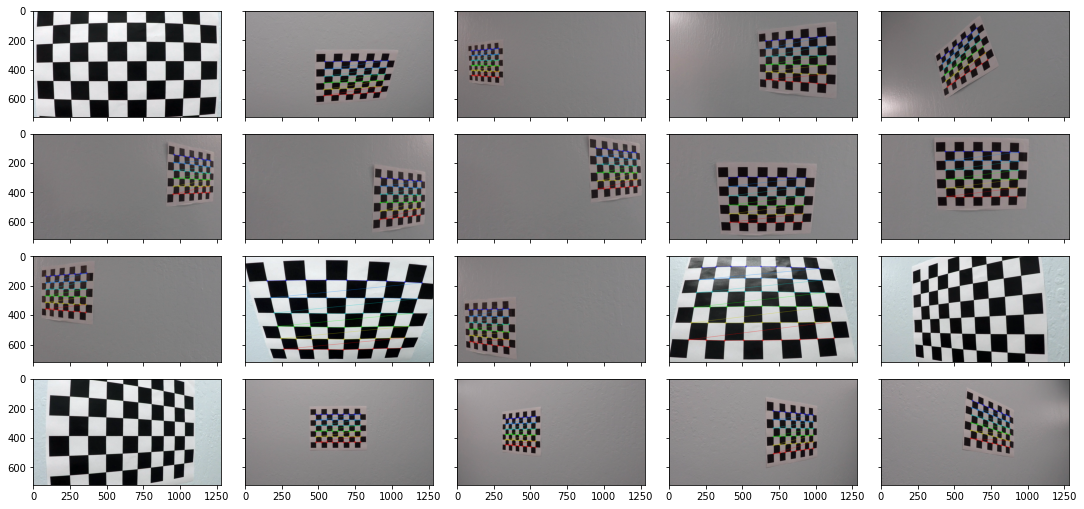

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join 

# Number of corners we have in our images
nx = 9
ny = 6

# List of object and image points
objpoints = []
objpoints_one = [(x,y,0) for y in range(ny) for x in range(nx)]
imgpoints = []

# Make a list of calibration images
path = 'camera_cal'
file_names = [join(path,f) for f in listdir(path) if (isfile(join(path, f)) and (".jpg" in f))]

# Create a canvas to draw
fig, axes = plt.subplots(nrows=4, ncols=5,sharex=True,sharey=True,figsize=(15,7))
plt.tight_layout(pad=0.2)
# Loop over each image
for file_name,ax in zip(file_names,axes.ravel()):
    
    # Read image
    img = cv2.imread(file_name)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        #Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        imgpoints.append(corners)
        objpoints.append(objpoints_one)
    else:
        print('ERROR - no corners found: ',file_name)
    ax.imshow(img)



### Calibrate camera

In [2]:
# Turn lists into numpy array
objpoints = np.array(objpoints, dtype=np.float32)
imgpoints = np.array(imgpoints, dtype=np.float32)
imgpoints = imgpoints.reshape(imgpoints.shape[0],imgpoints.shape[1],-1)

# Calibrate
ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print('Successfully calibrated!' if ret else 'Calibration failed')
print('cameraMatrix: ',cameraMatrix)
print('distCoeffs: ',distCoeffs)

Successfully calibrated!
cameraMatrix:  [[1.15777942e+03 0.00000000e+00 6.67111049e+02]
 [0.00000000e+00 1.15282305e+03 3.86129069e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distCoeffs:  [[-0.24688833 -0.02372814 -0.00109843  0.00035105 -0.00259138]]


### Undistort a test image

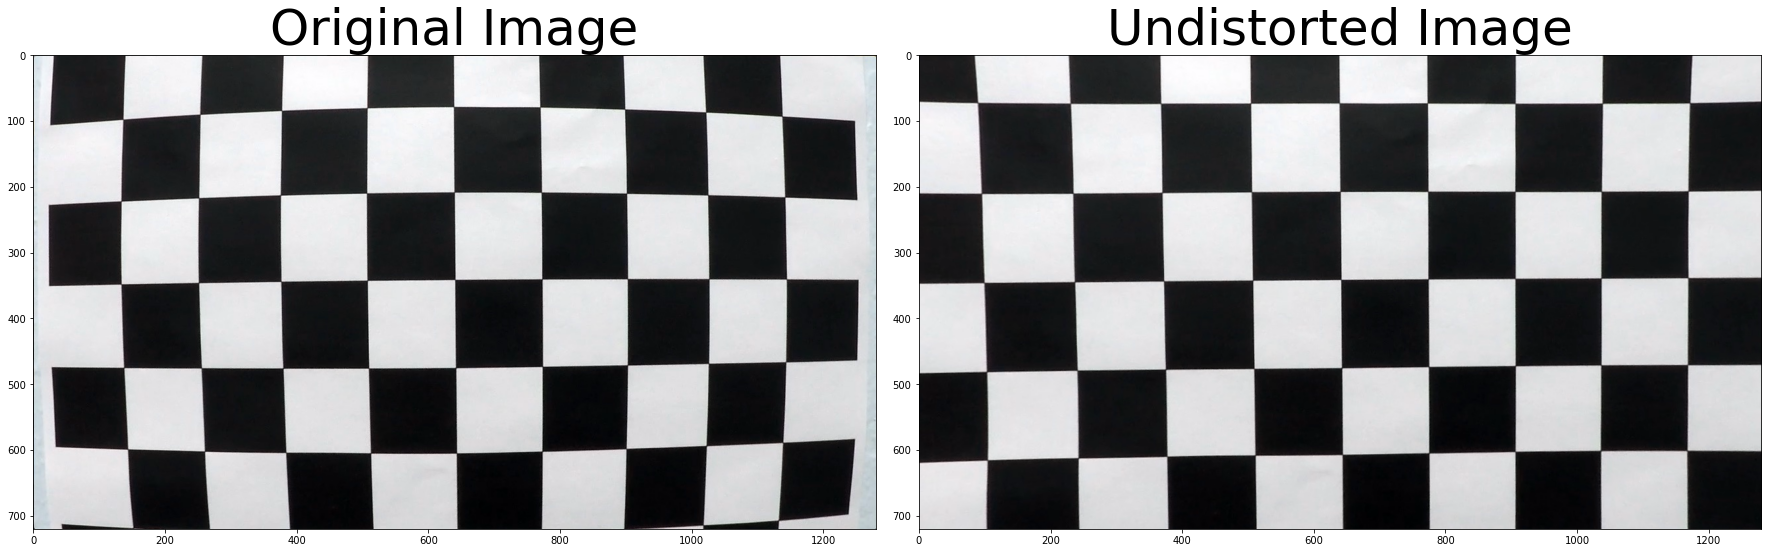

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image,
# calib1 was not used in determining the calibration
# since some of the corners are not on the image;
# it is 'previously unseen' to the calib
img = cv2.imread('camera_cal/calibration1.jpg')

# Function to undistort an image given 
# a cameraMatrix and distortion coefficeints
def cal_undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist)
    return undist

undistorted = cal_undistort(img, cameraMatrix, distCoeffs)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)